# WSRA example: surface wave state

During EUREC⁴A/ATOMIC the P-3 flew with a Wide Swath Radar Altimeter (WSRA),
a digital beam-forming radar altimeter operating at 16 GHz in the Ku band. It
generates 80 narrow beams spread over 30 deg to produce a topographic map of the
sea surface waves and their backscattered power. These measurements allow for
continuous reporting of directional ocean wave spectra and quantities derived from
this including significant wave height, sea surface mean square slope, and the
height, wavelength, and direction of propagation of primary and secondary wave fields.
WSRA measurements are processed by the private company [ProSensing](https://www.prosensing.com),
which designed and built the instrument.

The WSRA also produces rainfall rate estimates from path-integrated attenuation but
we won't look at those here.

The data are available through the EUREC⁴A intake catalog.

In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import pathlib
plt.style.use(pathlib.Path("./mplstyle/book"))
import colorcet as cc
%matplotlib inline

import eurec4a
cat = eurec4a.get_intake_catalog(use_ipfs="QmahMN2wgPauHYkkiTGoG2TpPBmj3p5FoYJAq9uE9iXT9N")

Mapping takes quite some setup. Maybe we'll encapsulate this later but for now we repeat code
in each notebook.

In [2]:
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from   cartopy.feature import LAND
from   cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def ax_to_map(ax, lon_w = -60.5, lon_e = -49, lat_s = 10, lat_n = 16.5):
    # Defining boundaries of the plot
    ax.set_extent([lon_w,lon_e,lat_s,lat_n]) # lon west, lon east, lat south, lat north
    ax.coastlines(resolution='10m',linewidth=1.5,zorder=1);
    ax.add_feature(LAND,facecolor='0.9')

def set_up_map(plt, lon_w = -60.5, lon_e = -49, lat_s = 10, lat_n = 16.5):
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax_to_map(ax, lon_w, lon_e, lat_s, lat_n)
    return(ax)

def add_gridlines(ax):
    # Assigning axes ticks
    xticks = np.arange(-65,0,2.5)
    yticks = np.arange(0,25,2.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1,
                      color='black', alpha=0.5, linestyle='dotted')
    gl.xlocator = mticker.FixedLocator(xticks)
    gl.ylocator = mticker.FixedLocator(yticks)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}
    gl.right_labels = False
    gl.bottom_labels = False
    gl.xlabel = {'Latitude'}

We'll select an hour's worth of observations from a single flight day. WSRA data
are stored as "trajectories" - discrete times with associated positions and
observations.

In [3]:
wsra_example = cat.P3.wsra["P3-0119"].to_dask().sel(trajectory=slice(0,293))

Now it's interesting to see how the wave slope (top panel) and the wave height (bottom)
vary spatially on a given day.

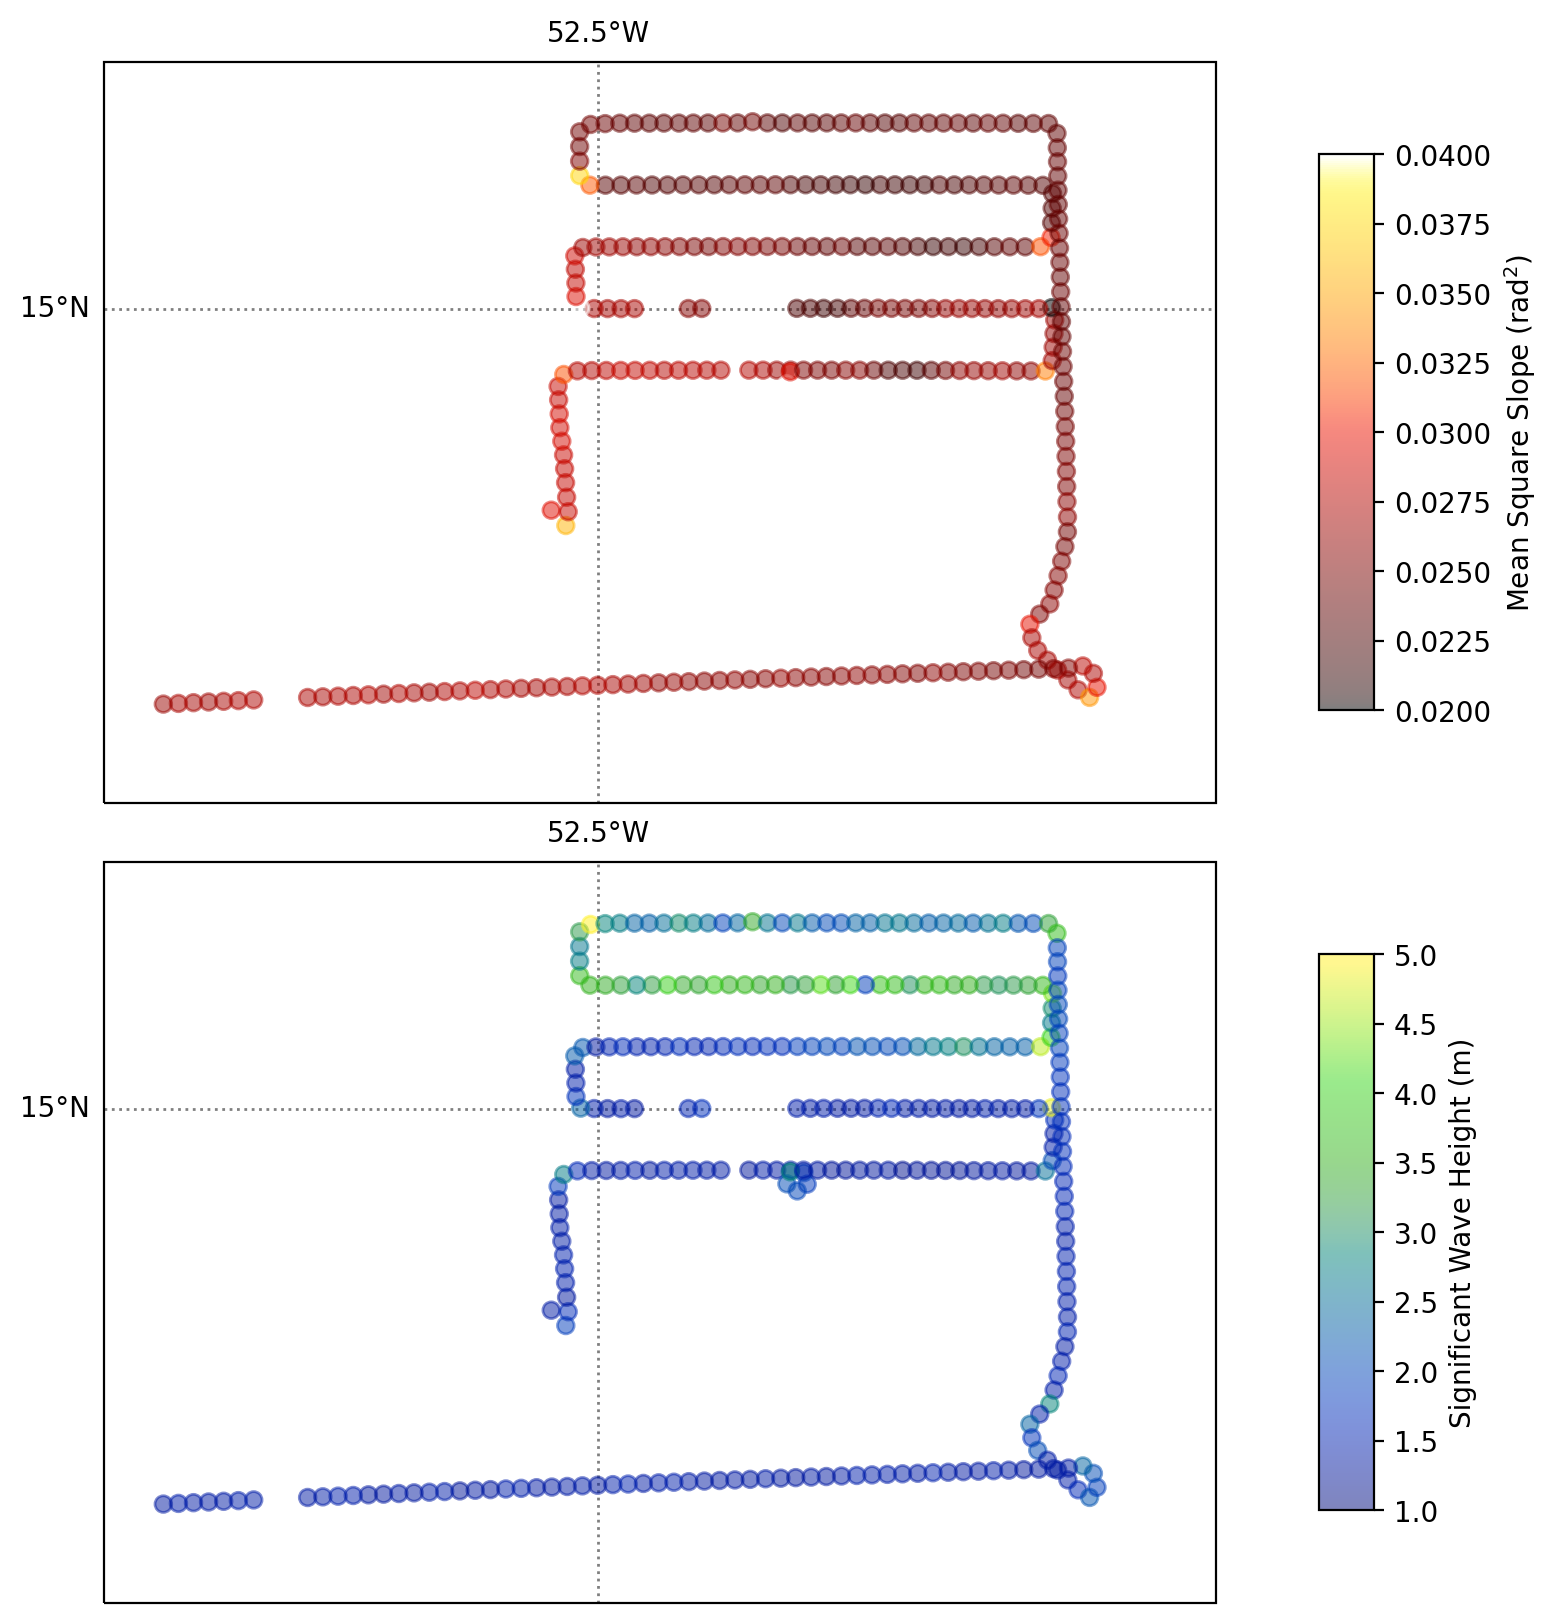

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex = True, figsize = (12,8), 
                               subplot_kw={'projection': ccrs.PlateCarree()})

#
# Mean square slope
#
ax_to_map(ax1, lon_e=-50, lon_w=-54.5, lat_s = 13, lat_n = 16)
add_gridlines(ax1)
pts = ax1.scatter(wsra_example.longitude,wsra_example.latitude,
           c=wsra_example.sea_surface_mean_square_slope_median,
           vmin = 0.02, vmax=0.04,
           cmap=cc.cm.fire,
           alpha=0.5,
           transform=ccrs.PlateCarree(),zorder=7)
fig.colorbar(pts, ax=ax1, shrink=0.75, aspect=10, label="Mean Square Slope (rad$^2$)")
#
# Significant wave height
#
ax_to_map(ax2, lon_e=-50, lon_w=-54.5, lat_s = 13, lat_n = 16)
add_gridlines(ax2)
pts = ax2.scatter(wsra_example.longitude,wsra_example.latitude,
           c=wsra_example.sea_surface_wave_significant_height,
           vmin = 1, vmax=5,
           cmap=cc.cm.bgy,
           alpha=0.5,
           transform=ccrs.PlateCarree(),zorder=7)
fig.colorbar(pts, ax=ax2, shrink=0.75, aspect=10, label="Significant Wave Height (m)")